<a href="https://colab.research.google.com/github/satpremrath/NLP/blob/main/Sentimental_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [10]:
df = pd.read_csv('Reviews.csv')
print(f"Shape of Input: {df.shape}")
df.head()

Shape of Input: (8187, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [11]:
df = df.head(5000).copy(deep=True)
print(df.shape)

(5000, 10)


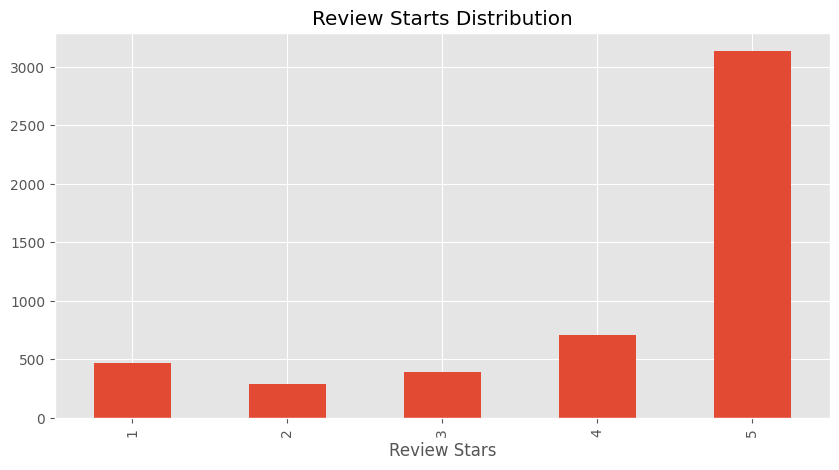

In [12]:
ax = df.Score.value_counts().sort_index().plot(kind= 'bar', title= 'Review Starts Distribution', figsize = (10,5))
ax.set_xlabel('Review Stars')
plt.show();

In [13]:
example = df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [14]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [15]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [16]:
entities = nltk.chunk.ne_chunk(tagged_tokens= tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


### VADER Sentiment Scoring

In [17]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [18]:
sia.polarity_scores('I am so happy')

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [19]:
sia.polarity_scores('This is the worst thing ever')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [20]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [21]:
# Run the polarity score on the dataset

res = {}
for _,row in tqdm(df.iterrows()):
  text = row['Text']
  myid = row['Id']
  res[myid] = sia.polarity_scores(text)

0it [00:00, ?it/s]

In [22]:
import pprint
pprint.pprint(res)

{1: {'compound': 0.9441, 'neg': 0.0, 'neu': 0.695, 'pos': 0.305},
 2: {'compound': -0.5664, 'neg': 0.138, 'neu': 0.862, 'pos': 0.0},
 3: {'compound': 0.8265, 'neg': 0.091, 'neu': 0.754, 'pos': 0.155},
 4: {'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 5: {'compound': 0.9468, 'neg': 0.0, 'neu': 0.552, 'pos': 0.448},
 6: {'compound': 0.883, 'neg': 0.029, 'neu': 0.809, 'pos': 0.163},
 7: {'compound': 0.9346, 'neg': 0.034, 'neu': 0.693, 'pos': 0.273},
 8: {'compound': 0.9487, 'neg': 0.0, 'neu': 0.52, 'pos': 0.48},
 9: {'compound': 0.6369, 'neg': 0.0, 'neu': 0.851, 'pos': 0.149},
 10: {'compound': 0.8313, 'neg': 0.0, 'neu': 0.705, 'pos': 0.295},
 11: {'compound': 0.9746, 'neg': 0.017, 'neu': 0.846, 'pos': 0.137},
 12: {'compound': -0.7579, 'neg': 0.113, 'neu': 0.887, 'pos': 0.0},
 13: {'compound': 0.296, 'neg': 0.031, 'neu': 0.923, 'pos': 0.046},
 14: {'compound': 0.9466, 'neg': 0.0, 'neu': 0.355, 'pos': 0.645},
 15: {'compound': 0.6486, 'neg': 0.104, 'neu': 0.632, 'pos': 0.264},
 

In [23]:
vaders = pd.DataFrame(res).T
vaders.reset_index().rename(columns= {'index':'Id'})
vaders.head()

,neg,neu,pos,compound
1,0.000,0.695,0.305,0.9441
2,0.138,0.862,0.000,-0.5664
3,0.091,0.754,0.155,0.8265
4,0.000,1.000,0.000,0.0000
5,0.000,0.552,0.448,0.9468


In [24]:
vaders = pd.concat([vaders, df], axis = 1)
vaders.head()

,neg,neu,pos,compound,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
1,0.000,0.695,0.305,0.9441,2.0,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,1.0,1.346976e+09,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,0.138,0.862,0.000,-0.5664,3.0,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,4.0,1.219018e+09,"""Delight"" says it all",This is a confection that has been around a fe...
3,0.091,0.754,0.155,0.8265,4.0,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,2.0,1.307923e+09,Cough Medicine,If you are looking for the secret ingredient i...
4,0.000,1.000,0.000,0.0000,5.0,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0.0,0.0,5.0,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...
5,0.000,0.552,0.448,0.9468,6.0,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0.0,0.0,4.0,1.342051e+09,Nice Taffy,I got a wild hair for taffy and ordered this f...


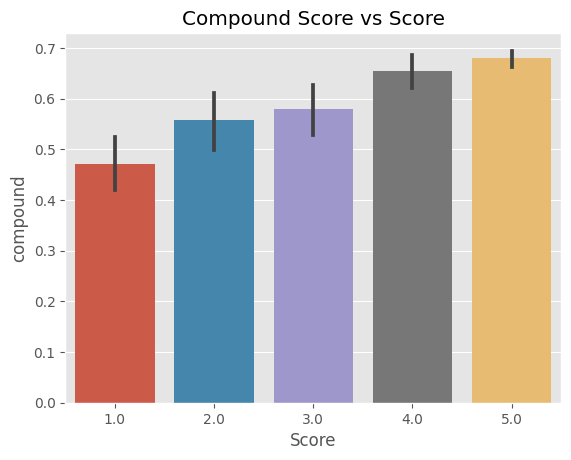

In [25]:
ax = sns.barplot(data= vaders, x= 'Score', y= 'compound')
ax.set_title('Compound Score vs Score')
plt.show();

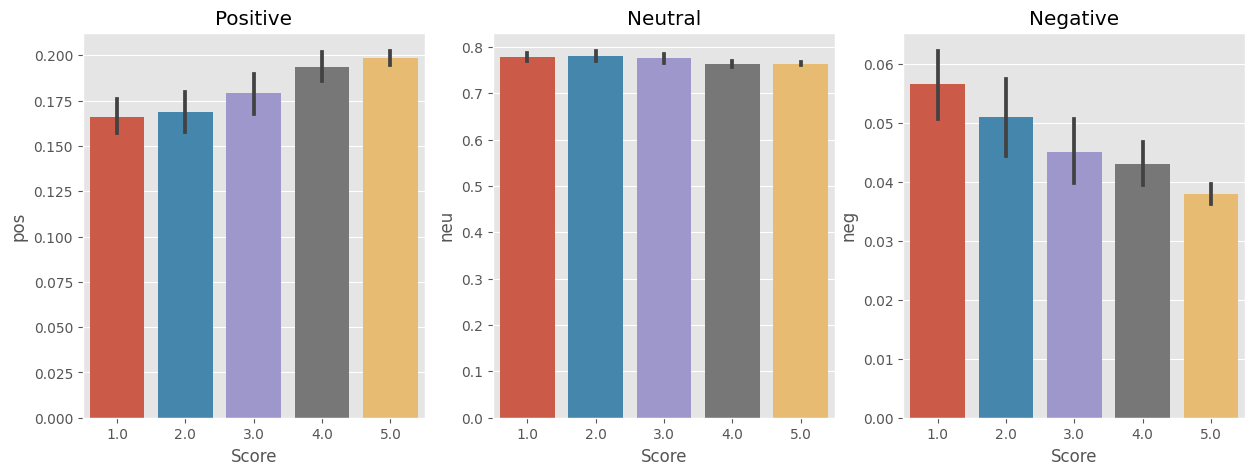

In [26]:
fig, axs = plt.subplots(1,3, figsize= (15,5))

sns.barplot(data= vaders, x= 'Score', y= 'pos', ax = axs[0])
sns.barplot(data= vaders, x= 'Score', y= 'neu', ax = axs[1])
sns.barplot(data= vaders, x= 'Score', y= 'neg', ax = axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.show()

### Roberta Pretrained Model

In [27]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 45.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 42.9 MB/s eta 0:00:00


In [28]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [29]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [30]:
encoded_text = tokenizer(example, return_tensors= 'pt')
print(encoded_text)

{'input_ids': tensor([[    0,   713,  1021, 38615,    16,    45,   205,     4,  3139, 39589,
           219,     6,  3793,     6,    38,   218,    75,   101,    24,     4,
          3232,  4218,   384,  2923,    16,     5,   169,     7,   213,     4,
             2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1]])}


In [31]:
output = model(**encoded_text)
output

SequenceClassifierOutput(loss=None, logits=tensor([[ 3.1436, -0.7107, -2.6559]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [32]:
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores

array([0.97635514, 0.02068748, 0.00295737], dtype=float32)

In [33]:
scores_dict = {
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2]
}
print(scores_dict)

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687476, 'roberta_pos': 0.002957372}


In [34]:
def polarity_scores_roberta(example):
  encoded_text = tokenizer(example, return_tensors= 'pt')
  output = model(**encoded_text)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  scores_dict = {
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2]
    }
  return scores_dict

In [35]:
# Run the polarity score on the dataset

res = {}
for _,row in tqdm(df.iterrows()):
  try:
    text = row['Text']
    myid = row['Id']
    vader_result = sia.polarity_scores(text)
    vader_result_rename = {}
    for k,v in vader_result.items():
      vader_result_rename[f"vader_{k}"] = v
    roberta_result = polarity_scores_roberta(text)
    both = {**vader_result_rename, **roberta_result}
    res[myid] = both
  except:
    print(f"Broke for id: {myid}")

0it [00:00, ?it/s]

Broke for id: 83
Broke for id: 187
Broke for id: 529
Broke for id: 540
Broke for id: 746
Broke for id: 863
Broke for id: 1053
Broke for id: 1070
Broke for id: 1156
Broke for id: 1321
Broke for id: 1375
Broke for id: 1498
Broke for id: 1575
Broke for id: 1796
Broke for id: 1826
Broke for id: 2169
Broke for id: 2248
Broke for id: 2476
Broke for id: 2492
Broke for id: 2584
Broke for id: 2610
Broke for id: 2897
Broke for id: 2898
Broke for id: 2902
Broke for id: 2928
Broke for id: 2942
Broke for id: 2944
Broke for id: 2947
Broke for id: 2948
Broke for id: 3022
Broke for id: 3023
Broke for id: 3025
Broke for id: 3306
Broke for id: 3788
Broke for id: 3969
Broke for id: 4107
Broke for id: 4110
Broke for id: 4307
Broke for id: 4316
Broke for id: 4408
Broke for id: 4483
Broke for id: 4512
Broke for id: 4553
Broke for id: 4583


In [41]:
resultsDF = pd.DataFrame(res).T
resultsDF = resultsDF.reset_index().rename(columns= {'index':'Id'})
resultsDF = resultsDF.merge(df, how= 'left')
resultsDF.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [42]:
resultsDF.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

### Compare Scores between Models

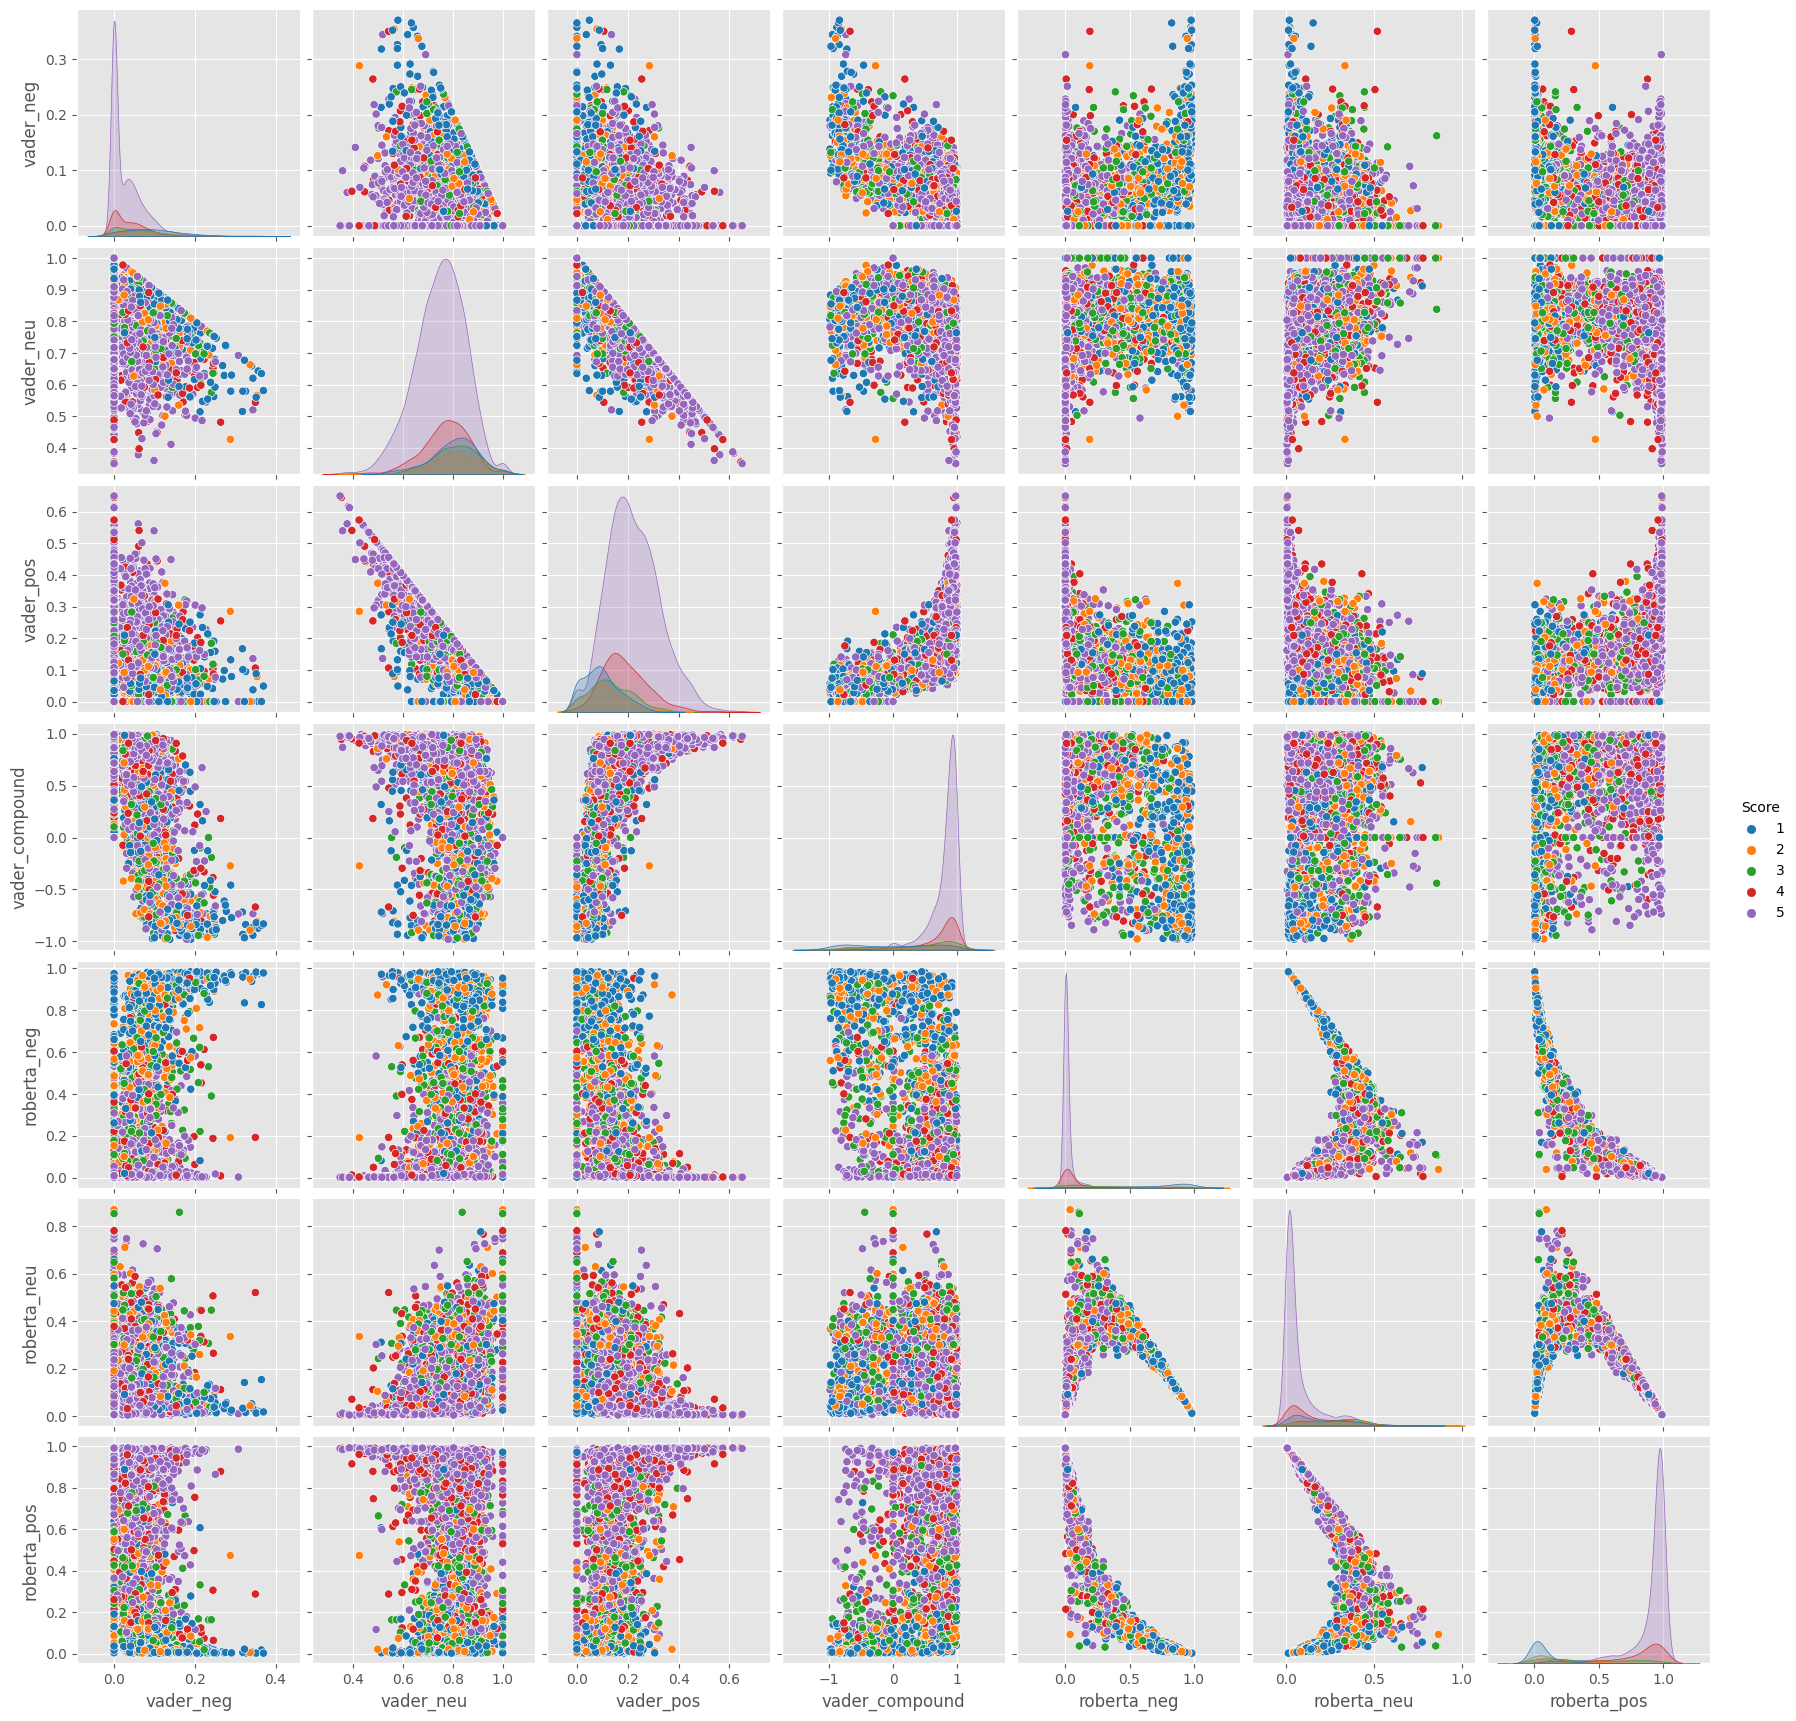

In [43]:
sns.pairplot(data= resultsDF, vars = ['vader_neg', 'vader_neu', 'vader_pos',
                                     'roberta_neg', 'roberta_neu', 'roberta_pos'],
             hue= 'Score',
             palette= 'tab10')
plt.show();

In [44]:
resultsDF.query('Score == 1').sort_values('roberta_pos', ascending= False)['Text'].values[0]

'Bisquick GF is easy to use. Pancakes and muffins are very<br />tasty. The product is quick and easy to use. It makes my day.  Gram'

In [45]:
resultsDF.query('Score == 1').sort_values('vader_pos', ascending= False)['Text'].values[0]

"Second ingredient is SUGAR! Need I say more? Make your own bisquit mix, it's super easy!"

### Reference:
Youtube: https://www.youtube.com/watch?v=QpzMWQvxXWk&t=727s